In [1]:

#pip install matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [3]:
import pandas as pd
data= pd.read_csv("D:\\MANIPAL_MSIS\\ML_PROJECTS\\DATA\\Social_Network_Ads.csv")
dataset=data
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
print(dataset.isnull().any()) # Checks if there are any missing values
print(dataset.isnull().sum())

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [5]:
dataset
x=dataset.iloc[:, 2:4].values
x[:10]

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000]], dtype=int64)

In [6]:
y=dataset.iloc[:,-1].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
y_train[:10]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [13]:
x_test[:10]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906],
       [-1.09058306, -1.44652121],
       [-0.70174008, -1.59138156],
       [-0.21568634,  2.14601566],
       [-1.96547978, -0.05586178],
       [ 0.85363187, -0.78016356]])

In [15]:
x_test.astype(int)[:10]

array([[ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1, -1],
       [ 0, -1],
       [ 0,  2],
       [-1,  0],
       [ 0,  0]])

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[53,  5],
       [ 3, 19]], dtype=int64)

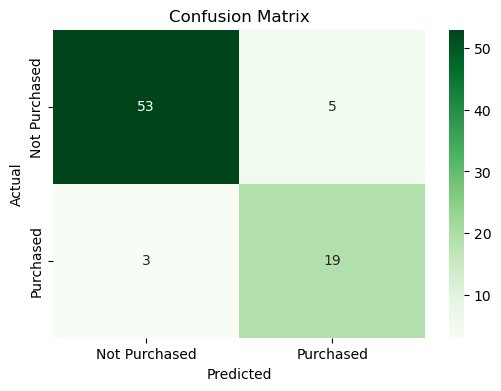

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
accuracy=(cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
accuracy

0.9

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        58
           1       0.79      0.86      0.83        22

    accuracy                           0.90        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.90      0.90      0.90        80



In [ ]:
from sklearn import tree
tree.plot_tree(classifier)